## Exploratory Data Analysis

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# set global display style
pd.set_option('float_format', '{:.2f}'.format)

# set global plotting style
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [138]:
lcbo = pd.read_csv('../data/processed/lcbo.csv', parse_dates=['release_date'])

# select only records with price below $500
lcbo = lcbo[lcbo.price < 500]

In [140]:
lcbo.select_dtypes(['float', 'int']).describe()

,price,sku,bottle_size,alcohol_vol,sugar_content,score
count,9307.00,9307.00,9307.00,9307.00,6230.00,2971.00
mean,44.66,462129.22,788.98,13.20,7.94,92.43
std,59.44,214183.49,286.04,1.30,13.70,2.38
min,3.10,26.00,3.00,4.50,2.00,86.00
25%,16.95,324277.00,750.00,12.50,3.00,91.00
50%,23.95,478198.00,750.00,13.50,4.00,92.00
75%,45.55,610034.50,750.00,14.00,8.00,94.00
max,499.95,999979.00,5000.00,50.00,212.00,99.00


In [141]:
lcbo.select_dtypes(['object']).describe()

,name,category,description,by,varietal,country,region,wine_type,group
count,9307,9112,8282,9266,9101,9307,7489,9307,9307
unique,9041,431,8031,3231,430,38,203,4,2
top,Martini & Rossi Asti,Chardonnay,Chardonnay is the world's most popular white w...,"Arterra Wines Canada, Inc.",Chardonnay,France,California,red,VINTAGES
freq,4,808,4,108,758,1955,908,5400,4699


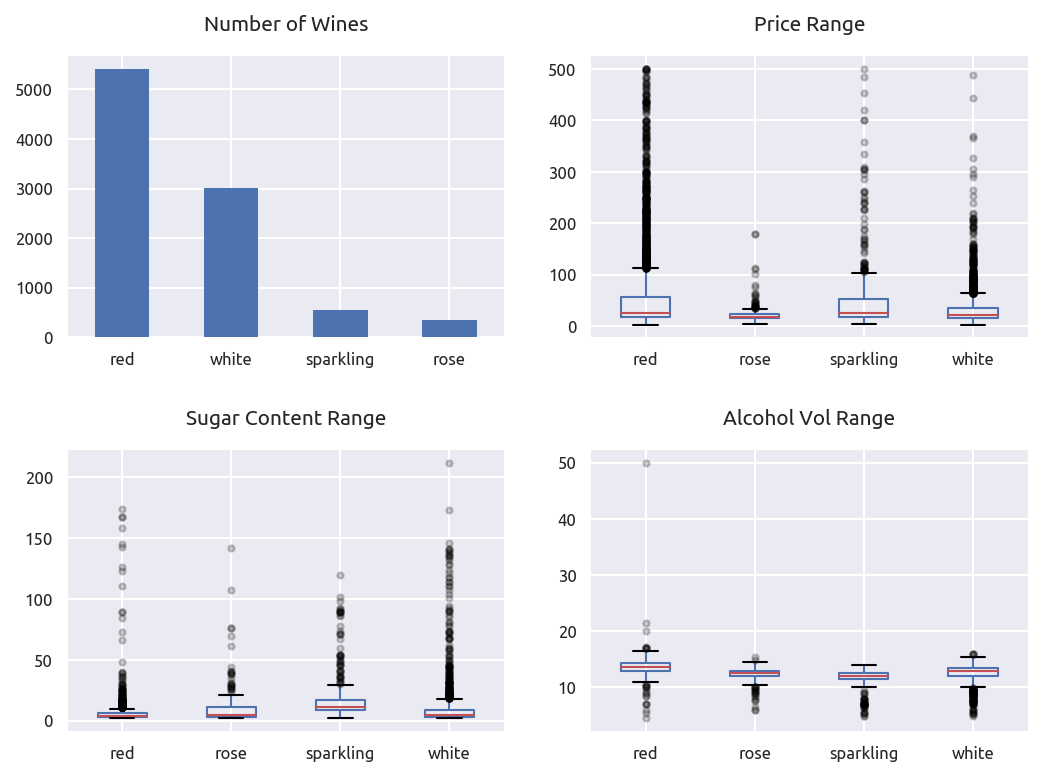

In [175]:
fig = plt.figure(figsize=(8, 6), dpi=150)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

ax1 = plt.subplot(2, 2, 1)
(lcbo.groupby('wine_type')['sku']
     .count()
     .sort_values(ascending=False)
     .plot.bar(title='Number of Wines', ax=ax1));
plt.xlabel('');
plt.xticks(rotation=0)

ax2 = plt.subplot(2, 2, 2)
flierprops = {'markerfacecolor': 'k', 'markersize': 3, 'alpha': 0.2}
lcbo.boxplot(column=['price'], by='wine_type',
             ax=ax2, flierprops=flierprops);
plt.title('Price Range');
plt.suptitle('');
plt.xlabel('');

ax3 = plt.subplot(2, 2, 3)
lcbo.boxplot(column=['sugar_content'], by='wine_type', 
             ax=ax3, flierprops=flierprops);
plt.title('Sugar Content Range');
plt.suptitle('');
plt.xlabel('');

ax4 = plt.subplot(2, 2, 4)
lcbo.boxplot(column=['alcohol_vol'], by='wine_type', 
             ax=ax4, flierprops=flierprops);
plt.title('Alcohol Vol Range');
plt.suptitle('');
plt.xlabel('');

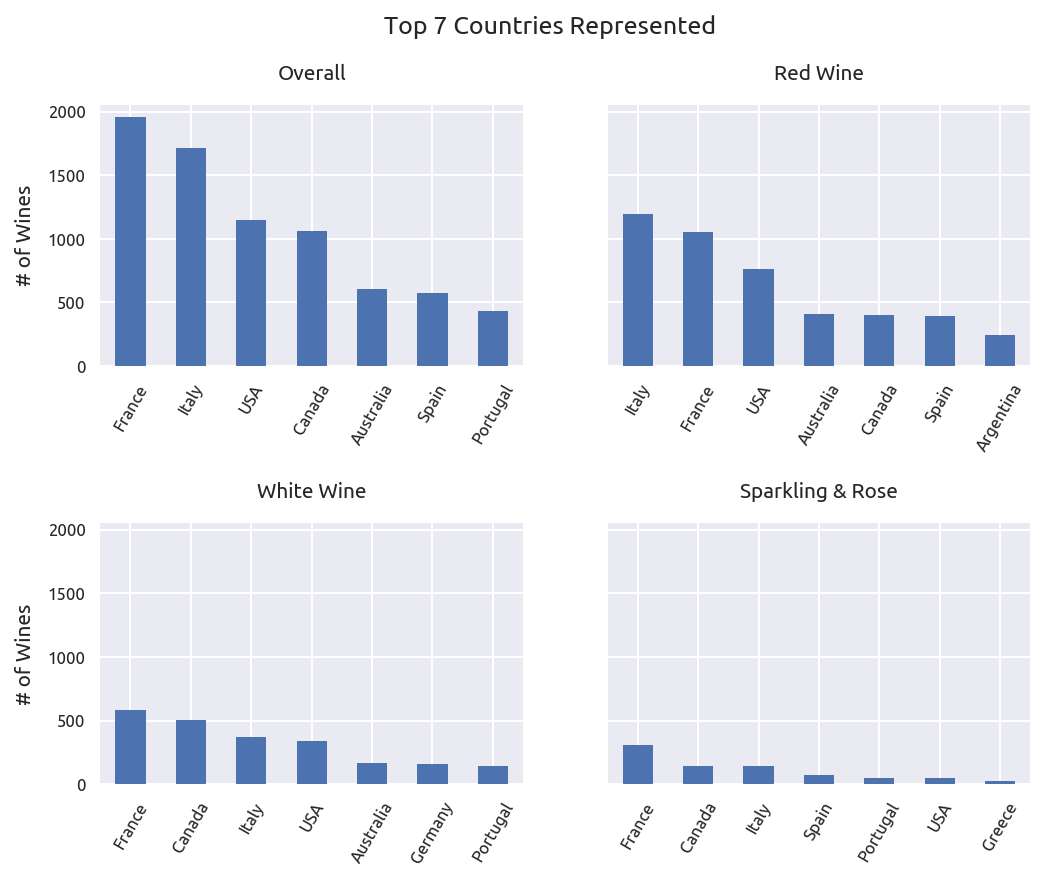

In [227]:
fig = plt.figure(figsize=(8, 6), dpi=150)
n = 7
fig.suptitle('Top {} Countries Represented'.format(n), fontsize=12)
plt.subplots_adjust(hspace=0.6, wspace=0.2)

ax1 = plt.subplot(2, 2, 1)
(lcbo.groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:n]
     .plot.bar(title='Overall', ax=ax1));
plt.xlabel('');
plt.ylabel('# of Wines');
plt.xticks(rotation=60);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
(lcbo.query('wine_type == "red"')
     .groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:n]
     .plot.bar(title='Red Wine', ax=ax2));
plt.xlabel('');
plt.xticks(rotation=60);

ax3 = plt.subplot(2, 2, 3, sharey=ax1)
(lcbo.query('wine_type == "white"')
     .groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:n]
     .plot.bar(title='White Wine', ax=ax3));
plt.xlabel('');
plt.ylabel('# of Wines');
plt.xticks(rotation=60);

ax4 = plt.subplot(2, 2, 4, sharey=ax1)
(lcbo.query('wine_type == "sparkling"|wine_type == "rose"')
     .groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:n]
     .plot.bar(title='Sparkling & Rose', ax=ax4));
plt.xlabel('');
plt.xticks(rotation=60);